In [20]:
PATH_TO_YOLO_FOLDER = '/Users/dominikocsofszki/Desktop/drive_fake/MyDrive/yolov5'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import yaml

def filter_duplicates_given_names(df, round_nr):
    filter = df.round(round_nr).duplicated(subset=['cw'], keep='first')
    return df[~filter]


def return_filter_cw_minmax_ch_minmax(tub,df:pd.DataFrame):
    (cw_min, cw_max, hw_min, hw_max) = tub
    print(f'{cw_min}, {cw_max}, {hw_min}, {hw_max}')
    filter_boundries = (cw_min <= df['cw']) & (df['cw'] < cw_max) & (hw_min < df['ch']) & (df['ch'] < hw_max)
    return filter_boundries


def final_return_filter_duplicates(row,df:pd.DataFrame):
    # (cw_min, cw_max, hw_min, hw_max) = row["cw"] - (row['w'] / 2), row["cw"] + (row['w'] / 2), row["ch"] - (
    #             row['h'] / 2), row["ch"] + (row['h'] / 2),
    cw_min = row["cw"] - (row['w'] / 2)
    cw_max = row["cw"] + (row['w'] / 2)
    hw_min = row["ch"] - (row['h'] / 2)
    hw_max = row["ch"] + (row['h'] / 2)
    filter_boundries = (cw_min <= df['cw']) & (df['cw'] < cw_max) & (hw_min < df['ch']) & (df['ch'] < hw_max)
    return filter_boundries


def get_key(my_dict, val):  #better way for sure possible
    for key, value in my_dict.items():
        if val == value:  #string compare no equals???
            return key


def change_and_return_yaml_dict(path_to_yaml_folder):
    label_folder = Path(path_to_yaml_folder)
    fname = label_folder / 'data.yaml'
    with open(fname) as f:
        yaml_load = yaml.safe_load(f)
    yaml_load["path"] = str(label_folder.resolve())
    with open(fname, "w") as f:
        yaml.dump(yaml_load, f, default_flow_style=False)
        return yaml_load


def dict_classes_and_yaml(data_yaml_source):
    dict_yaml = change_and_return_yaml_dict(data_yaml_source)
    dict_classes = dict(enumerate(map(str, dict_yaml.get('names'))))
    return dict_classes, dict_yaml

def read_csv_new_header(csv_txt_path) :
    # df = pd.read_csv(csv_txt_path,header=None,names=('class_nr','ch','cw','h','w','p'))
    df = pd.read_csv(csv_txt_path,names=['class_nr','cw','ch','w','h','p'],delimiter=' ')
    return df

##WORKING PLEASE NO CHAGE!!
def check_label_all(df:pd.DataFrame, img, above_center=-30, first_x_labels_diff_colour=10,
                    list_index_changed_before=None):
    if list_index_changed_before is None:
        list_index_changed_before = []
    plt.rcParams['figure.dpi'] = 200
    plot, ax = plt.subplots()
    w = img.shape[0]
    h = img.shape[1]
    for i in range(df.shape[0]):
        df_entry = df.iloc[i]
        hmp = df_entry[1] * h
        wmp = df_entry[2] * w
        # print(df_entry)
        col_changing = 'red'
        if i <= first_x_labels_diff_colour: col_changing = 'pink'
        if i in list_index_changed_before: col_changing = 'green'
        ax.plot(hmp, wmp + above_center, marker='$' + str(i) + ',' + '$', color=col_changing, ms=8)
    ax.plot()
    # ax.imshow(plt.imread(path_to_image))
    ax.imshow(img)
    ax.plot()
##until
def return_filter_cw_minmax_ch_minmax(tub,df:pd.DataFrame):
    (cw_min, cw_max, hw_min, hw_max) = tub
    print(f'{cw_min}, {cw_max}, {hw_min}, {hw_max}')
    filter_boundries = (cw_min <= df['cw']) & (df['cw'] < cw_max) & (hw_min < df['ch']) & (df['ch'] < hw_max)
    return filter_boundries

def final_filter_out_one_line(df:pd.DataFrame,indx:int) :
    filter = return_filter_cw_minmax_ch_minmax((0,1,df.iloc[indx]['cw']-df.iloc[indx]['w']/2,df.iloc[indx]['cw']+df.iloc[indx]['w']/2),df=df)
    return filter



def path_to_yolo_return_dict_paths(PATH_TO_YOLO_FOLDER):
    yolo = Path(PATH_TO_YOLO_FOLDER)
    labelme = yolo.parent / 'labelme'
    detect_labelme = labelme / 'detect_labelme.py'
    runs = labelme / 'runs'
    override_no_inc = runs/'detect'/'override_no_inc'
    copy = labelme / 'copy'
    weight = labelme / 'weight'
    weight_best = labelme / 'weight' / 'best.pt'
    detect = yolo / 'detect.py'
    train = yolo / 'train.py'
    labels = override_no_inc/'labels'
    source = override_no_inc/'source'
    screenshots = labelme/'source'
    # yaml = weight/'data.yaml'
    dict_paths = {
        # 'yaml': yaml,
        'original': source,
        'screenshots': screenshots,
        'labels': labels,
        'labelled_pic' : override_no_inc,
        'override':override_no_inc,
        'train': train,
        'detect': detect,
        'yolo': yolo,
        'labelme': labelme,
        'source': source,
        'detect_labelme': detect_labelme,
        'runs': runs,
        'copy': copy,
        'weight': weight,
        'weight_best': weight_best
    }
    for x in dict_paths:
        print(f'{x}: {dict_paths[x]}')
    return dict_paths


dict_path = path_to_yolo_return_dict_paths(PATH_TO_YOLO_FOLDER)


x = dict_path['labels'].iterdir()

entries = [entry for entry in dict_path['labels'].iterdir()]

def return_path_entries_folder(path_to_img_folder:Path) :
    # entries = [entry for entry in dict_path['labels'].iterdir()]
    # entries = [Path(entry) for entry in path_to_img_folder.iterdir()]
    entries = [entry for entry in path_to_img_folder.iterdir()] ##need to ignore other files!?!?<<<<<<<<
    entries.sort()
    return entries
# def class_nr_to_name(x) :


# entries_images = return_path_entries_folder(dict_path['labels'])
# entries_labels = return_path_entries_folder(dict_path['source'])
def full_run_labelme() :
    dict_classes, _ = dict_classes_and_yaml(dict_path['weight'])
    # entries_images = return_path_entries_folder(dict_path['source'])
    entries_images = return_path_entries_folder(dict_path['screenshots'])
    entries_images = return_path_entries_folder(dict_path['override'])
    entries_labels = return_path_entries_folder(dict_path['labels'])
    path_to_labels = dict_path['labels']
    for img_path in entries_images :
        if not img_path.is_file() : continue
        # labels_path = entries_labels/img_path.stem/'.txt'
        labels_path = (path_to_labels/(img_path.stem+'.txt'))
        ##
        if not labels_path in entries_labels :
            print(f'Missing Label: {img_path.stem}')    ##Could also put it into a file later
            continue
        ##
        df = read_csv_new_header(labels_path)
        # dict_classes[]

        df['dict'] = df['class_nr'].map(dict_classes)

        print(df)
        img = plt.imread(img_path)
        for i in range(df.shape[0]):
            filter_find_duplicates_one_entry = final_return_filter_duplicates(df.iloc[i],df=df)

        df_noduplicate = filter_duplicates_given_names(df, 3)

        check_label_all(df=df_noduplicate.sort_values('cw'),img=img,above_center = -50)##calc above center dep. size
        # check_label_all(df=df[final_filter_out_one_line(df,2)].sort_values('cw'),img=img)
        df_noduplicate.to_csv(labels_path.with_suffix('.csv'))

        input()
        print("hallo")
        # break

original: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/labelme/runs/detect/override_no_inc/source
screenshots: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/labelme/source
labels: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/labelme/runs/detect/override_no_inc/labels
labelled_pic: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/labelme/runs/detect/override_no_inc
override: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/labelme/runs/detect/override_no_inc
train: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/yolov5/train.py
detect: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/yolov5/detect.py
yolo: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/yolov5
labelme: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/labelme
source: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/labelme/runs/detect/override_no_inc/source
detect_labelme: /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/labelme/detect_labelme.py
runs: /Users/dominikocsofszki/Desktop/dr

yolo:/Users/dominikocsofszki/PycharmProjects/checklabel/../../Desktop/drive_fake/MyDrive/yolov5
labelme_source: /Users/dominikocsofszki/PycharmProjects/checklabel/../../Desktop/drive_fake/MyDrive/labelme/source
detect_folder: /Users/dominikocsofszki/PycharmProjects/checklabel/../../Desktop/drive_fake/MyDrive/labelme/runs/detect
original_source: /Users/dominikocsofszki/PycharmProjects/checklabel/../../Desktop/drive_fake/MyDrive/labelme/source
yaml: /Users/dominikocsofszki/PycharmProjects/checklabel/../../Desktop/drive_fake/MyDrive/labelme/weight/data.yaml
original: /Users/dominikocsofszki/PycharmProjects/checklabel/../../Desktop/drive_fake/MyDrive/labelme/runs/detect/override_no_inc/source
labels: /Users/dominikocsofszki/PycharmProjects/checklabel/../../Desktop/drive_fake/MyDrive/labelme/runs/detect/override_no_inc/labels
labelled_pic: /Users/dominikocsofszki/PycharmProjects/checklabel/../../Desktop/drive_fake/MyDrive/labelme/runs/detect/override_no_inc
override: /Users/dominikocsofszki

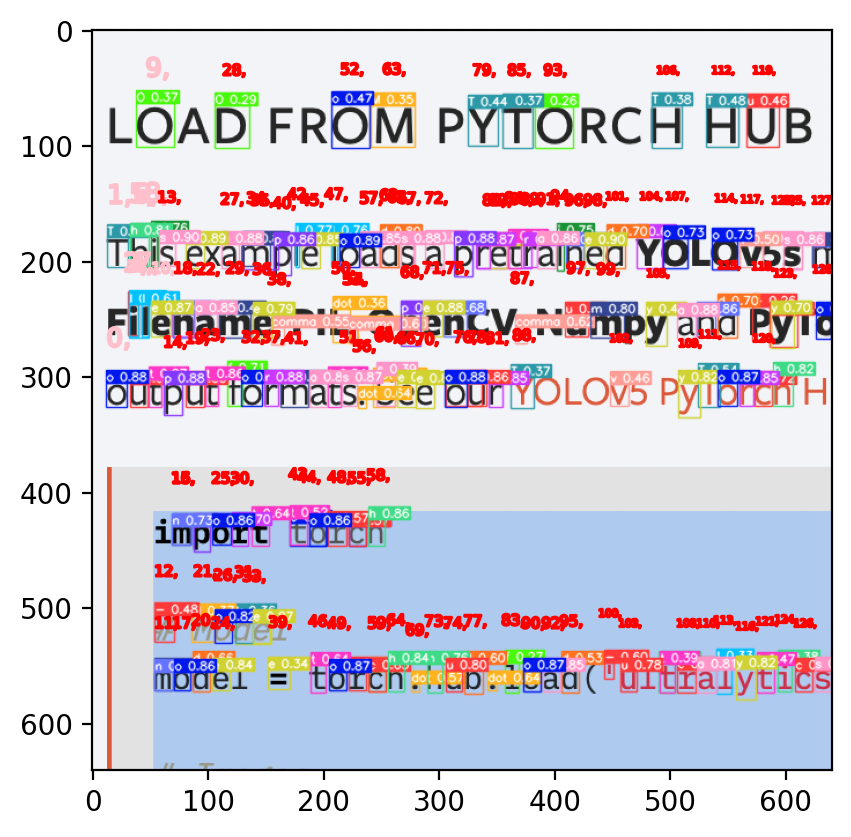

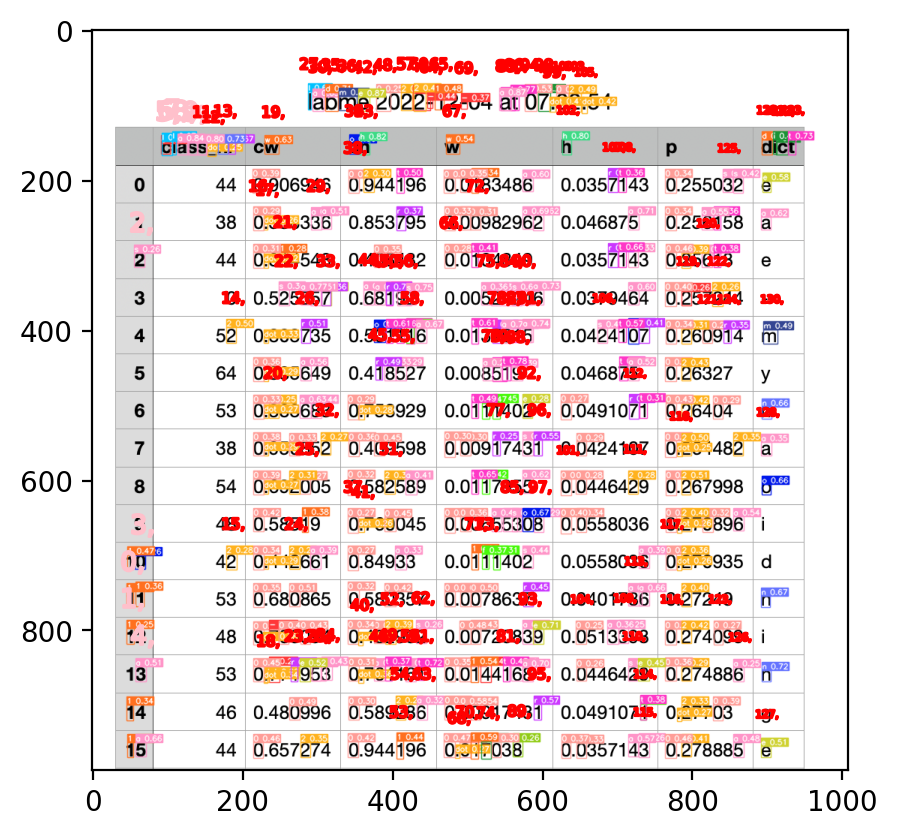

In [22]:
!python /Users/dominikocsofszki/Desktop/drive_fake/MyDrive/yolov5/detect_labelme.py
full_run_labelme()
